1.remove null values

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
os.getcwd()

In [ ]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

In [ ]:
df.drop(columns=['area_type','availability','balcony','society'],inplace=True)

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df['size']=df['size'].fillna('2 bhk')

In [ ]:
df['bath']=df['bath'].fillna(df['bath'].median())

In [ ]:
df['location']=df['location'].fillna('Sarjapur Road')

In [ ]:
df.info()

In [ ]:
df.head()

2.feature engineering


In [ ]:
df['BHK']=df['size'].str.split().str.get(0).astype(int)

In [ ]:
df['total_sqft'].unique()

In [ ]:
def convertRange(x):
  temp = x.split('-')
  if len(temp)==2:
   return (float(temp[0])+float(temp[1])/2)
  try:
    return float(x)
  except:
    return None

In [ ]:
df['total_sqft']=df['total_sqft'].apply(convertRange)

In [ ]:
df['price']=pd.to_numeric(df['price'],errors='coerce')

In [ ]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors='coerce')
df['total_sqft'].fillna(df['total_sqft'].median(), inplace=True)


In [ ]:
df1=df.copy()
df1['price_per_sqft']=df['price']*100000/df['total_sqft']
df1.head()

In [ ]:
df1.isnull().sum()

2.1 confusion (location)

In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13320 non-null  object 
 1   size            13320 non-null  object 
 2   total_sqft      13320 non-null  float64
 3   bath            13320 non-null  float64
 4   price           13320 non-null  float64
 5   BHK             13320 non-null  int32  
 6   price_per_sqft  13320 non-null  float64
dtypes: float64(4), int32(1), object(2)
memory usage: 676.5+ KB


In [58]:
print(df['location'])

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13320, dtype: object


In [59]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: count, Length: 1306, dtype: int64

In [60]:
df1['location']=df1['location'].apply(lambda x: x.strip())

In [61]:
location_count=df1['location'].value_counts()

In [62]:
location_count_less_10=location_count[location_count<=10]
location_count_less_10

Series([], Name: count, dtype: int64)

In [63]:
df1['location']=df1['location'].apply(lambda x:'other' if x in location_count_less_10 else x)

In [64]:
df1['location'].value_counts()

location
other                 2886
Whitefield             541
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

3. outlier detection and removal

In [65]:
df1.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [66]:
(df1['total_sqft']/df1['BHK']).describe()

count    13320.000000
mean       579.771079
std        392.165879
min          0.250000
25%        473.333333
50%        554.000000
75%        627.500000
max      26136.000000
dtype: float64

In [67]:
df2=df1[((df1['total_sqft']/df1['BHK'])>=300)]
df2.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,12568.000000,12568.000000,12568.000000,12568.000000,12568.000000
mean,1606.920444,2.559039,111.409518,2.650064,6287.738717
std,1276.170934,1.077715,151.916676,0.976813,4183.512928
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1120.000000,2.000000,49.000000,2.000000,4177.436629
50%,1300.000000,2.000000,70.000000,3.000000,5275.912551
75%,1710.000000,3.000000,115.000000,3.000000,6904.652015
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [68]:
(df2['total_sqft']/df2['BHK']).describe()

count    12568.000000
mean       602.941837
std        391.516681
min        300.000000
25%        492.500000
50%        564.000000
75%        634.666667
max      26136.000000
dtype: float64

In [69]:
df2.shape

(12568, 7)

In [70]:
df2['price_per_sqft'].describe().apply(lambda x:format(x,'f'))

count     12568.000000
mean       6287.738717
std        4183.512928
min         267.829813
25%        4177.436629
50%        5275.912551
75%        6904.652015
max      176470.588235
Name: price_per_sqft, dtype: object

In [71]:
def remove_pps_outlier(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df=subdf[(subdf.price_per_sqft>(m-st))& (subdf.price_per_sqft<(m+st))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out
df3=remove_pps_outlier(df2)
df3.shape

(10340, 7)

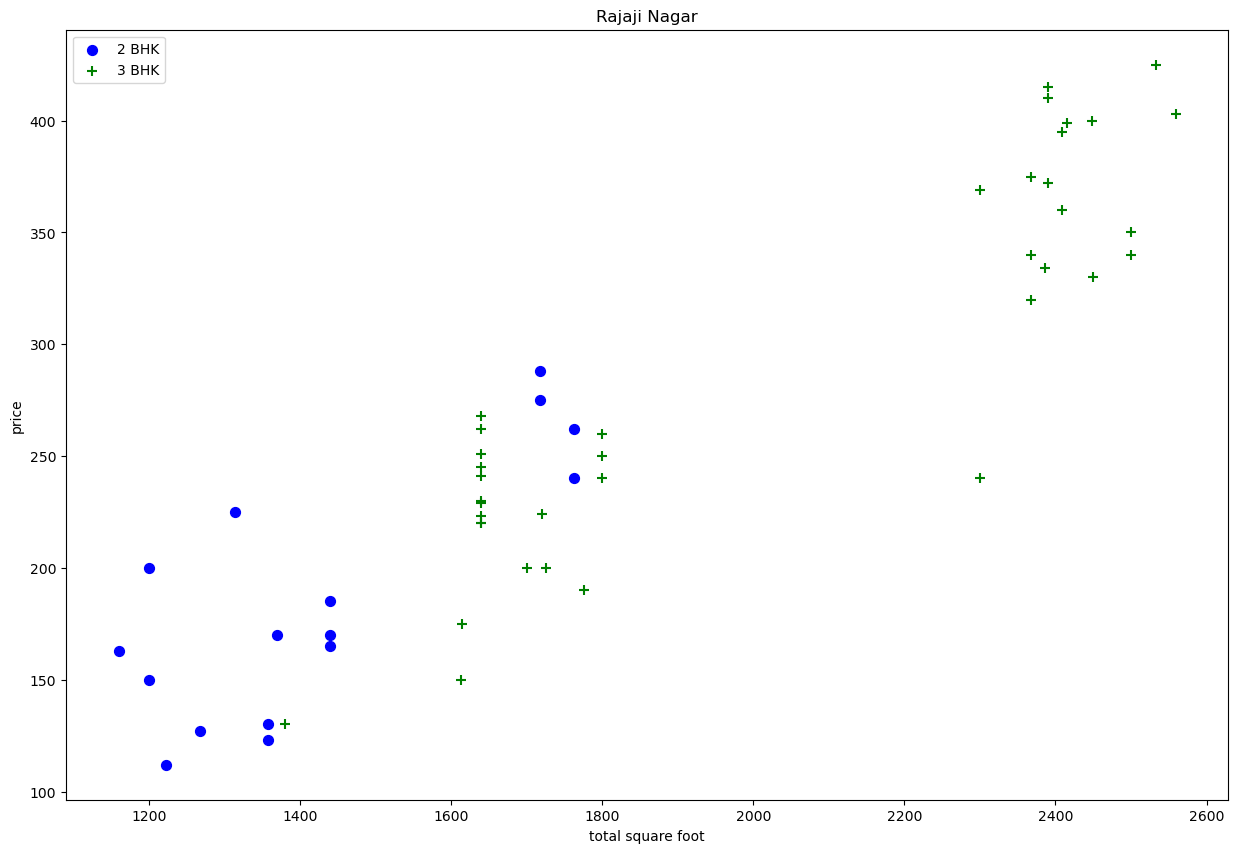

In [72]:
import matplotlib.pyplot as plt
def plot_scatter_chart(df,location):
  bhk2=df[(df.location==location)&(df.BHK==2)]
  bhk3=df[(df.location==location)&(df.BHK==3)]
  plt.rcParams['figure.figsize']=(15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price,color='Blue',label='2 BHK',s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,color='green',marker='+',label='3 BHK',s=50)
  plt.xlabel('total square foot')
  plt.ylabel('price')
  plt.title(location)
  plt.legend()
plot_scatter_chart(df3,'Rajaji Nagar')

In [73]:
df3.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [74]:
def bhk_outlier_remover(df):
  exclude_indices=np.array([])
  for location,location_df in df.groupby('location'):
    bhk_stats={}
    for BHK,bhk_df in location_df.groupby('BHK'):
      bhk_stats[BHK]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]
      }
    for BHK,bhk_df in location_df.groupby('BHK'):
      stats=bhk_stats.get(BHK-1)
      if stats and stats['count']>5:
        exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')

df4=bhk_outlier_remover(df3)
df4.shape

(7374, 7)

Text(0, 0.5, 'counts')

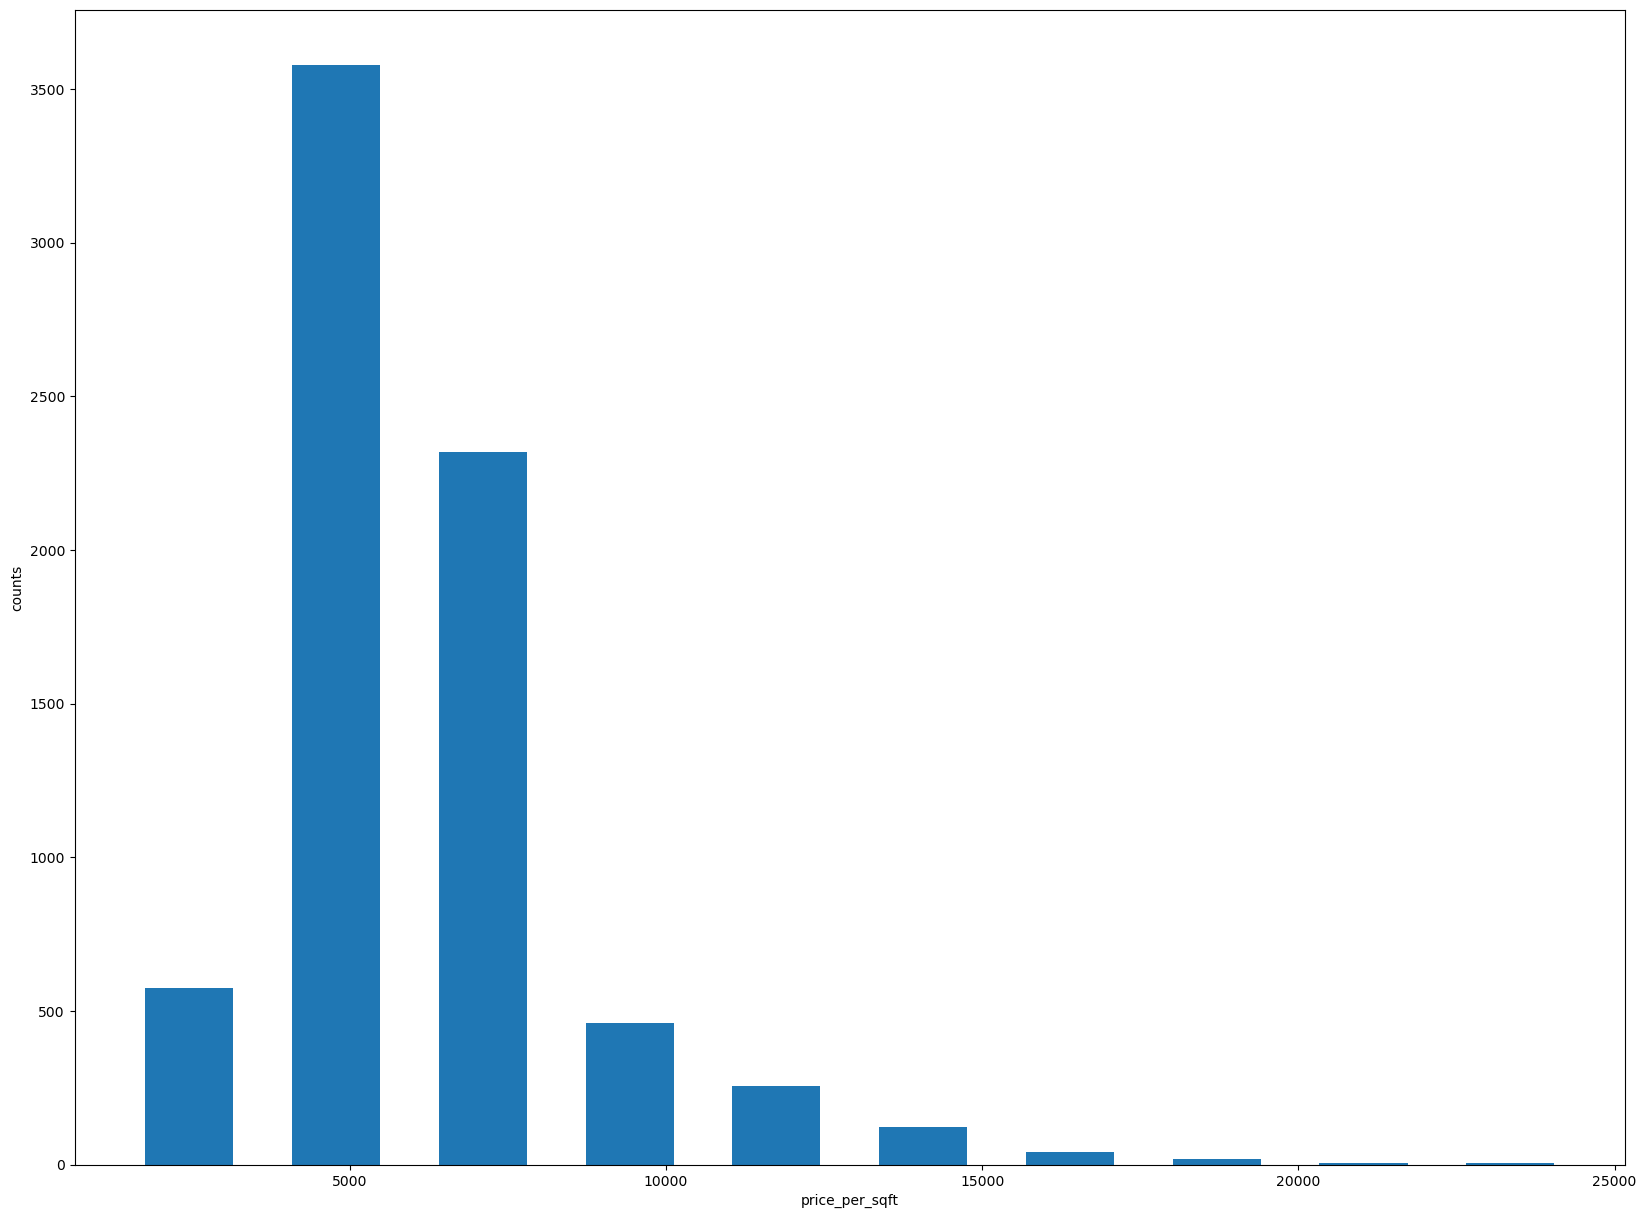

In [75]:
plt.rcParams['figure.figsize']=(20,15)
plt.hist(df4.price_per_sqft,rwidth=0.6)
plt.xlabel('price_per_sqft')
plt.ylabel('counts')

outlier remove using bathroom feature

In [76]:
df4.bath.unique()

array([ 4.,  3.,  2.,  5.,  1.,  8.,  6.,  7.,  9., 12., 16., 13.])

In [77]:
df4[df4.bath>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5330,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8576,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8665,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9399,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9732,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'counts')

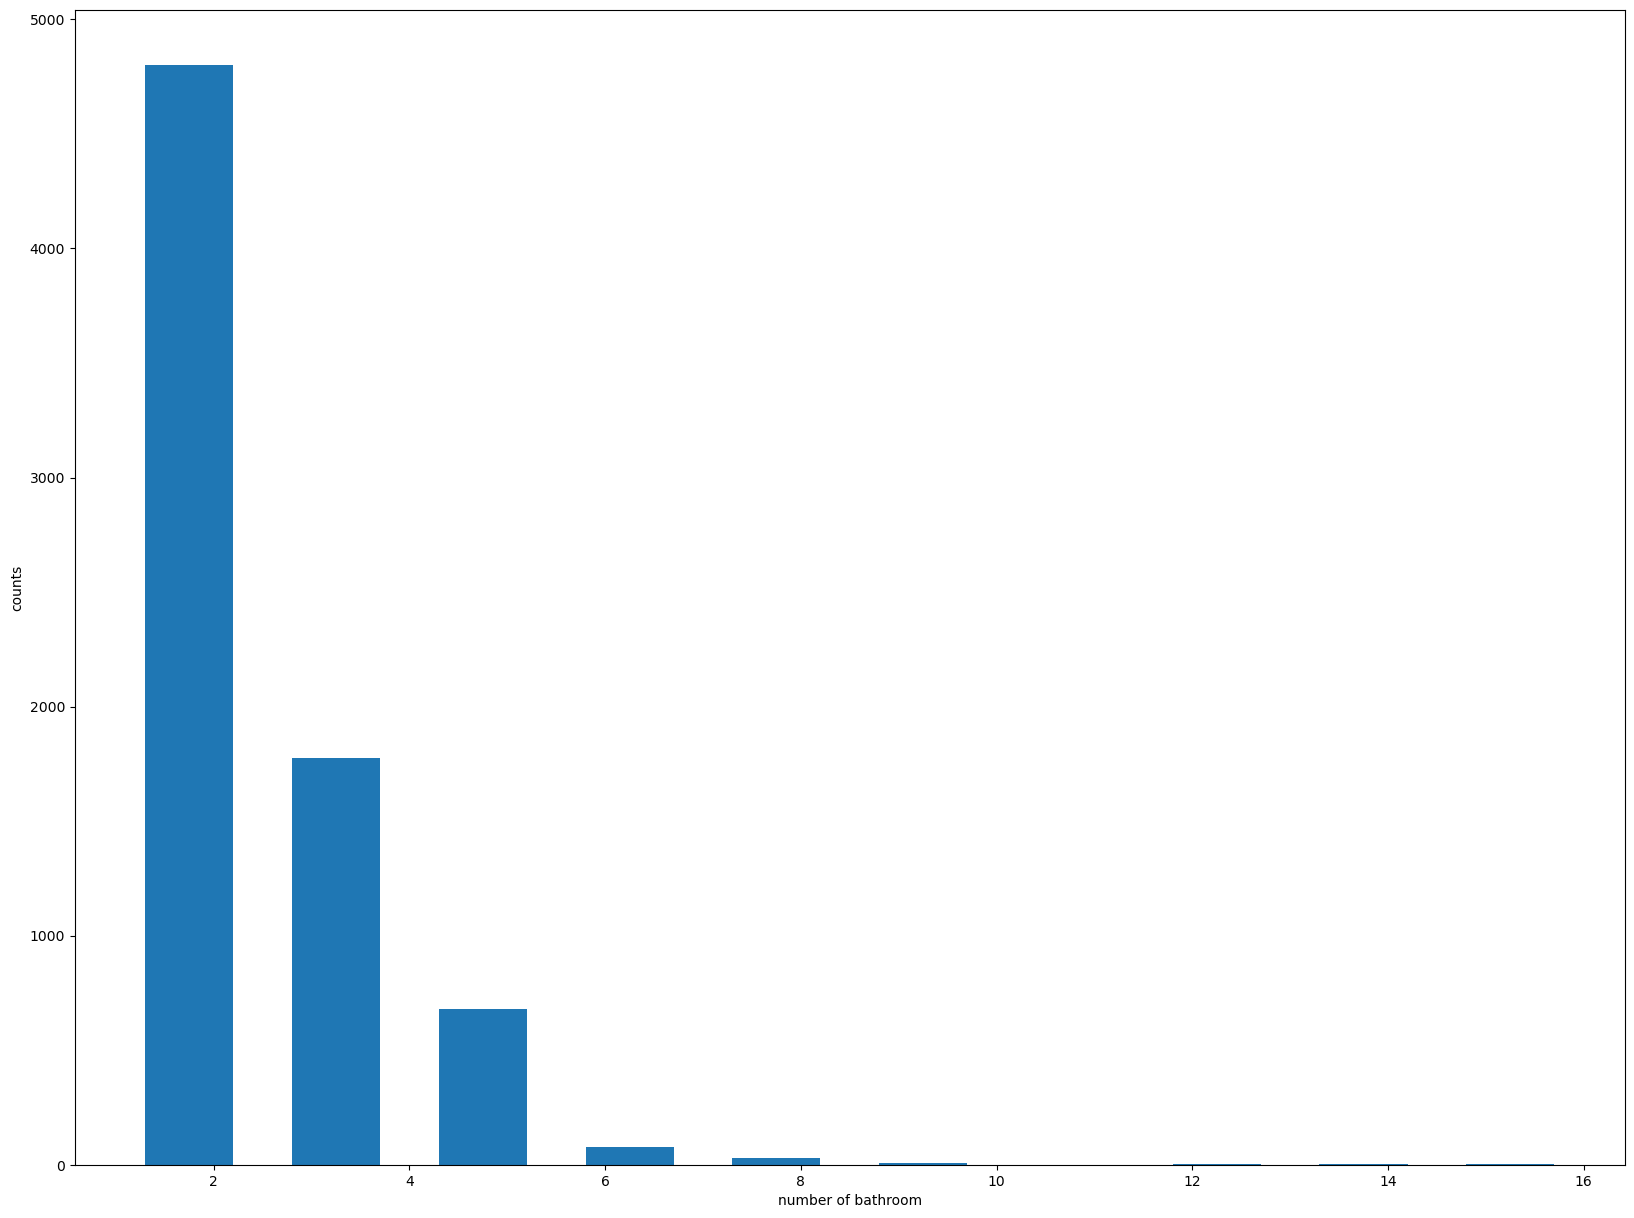

In [117]:
plt.rcParams['figure.figsize']=(20,15)
plt.hist(df4.bath,rwidth=0.6)
plt.xlabel('number of bathroom')
plt.ylabel('counts')

In [118]:
df4[df4.bath>df4.BHK+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1636,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5291,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6784,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8500,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [119]:
df5=df4[df4.bath<df4.BHK+2]
df5.shape


(7299, 7)

In [120]:
df6=df5.drop(columns=['price_per_sqft','size'])

In [121]:
df6

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10331,other,1200.0,2.0,70.0,2
10332,other,1800.0,1.0,200.0,1
10335,other,1353.0,2.0,110.0,2
10336,other,812.0,1.0,26.0,1


Build a new model now....

In [122]:
x=df6.drop('price',axis='columns')
x.head()

,location,total_sqft,bath,BHK
0,1st Block Jayanagar,2850.0,4.0,4
1,1st Block Jayanagar,1630.0,3.0,3
2,1st Block Jayanagar,1875.0,2.0,3
3,1st Block Jayanagar,1200.0,2.0,3
4,1st Block Jayanagar,1235.0,2.0,2


In [123]:
y=df6.price

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [125]:
print(x_train.shape)
print(x_test.shape)

(5839, 4)
(1460, 4)


applying linear regression

In [126]:
column_trans=make_column_transformer((OneHotEncoder(sparse_output=False,handle_unknown='ignore'),['location']),remainder='passthrough')

In [127]:
scaler=StandardScaler()

In [128]:
lr=LinearRegression()

In [129]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('columntransformer', column_trans),
    ('scaler', scaler),
    ('lr', lr)
])


In [130]:
pipe.fit(x_train,y_train)

E:\anaconda\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('scaler', StandardScaler()), ('lr', LinearRegression())])

In [131]:
y_pred_lr=pipe.predict(x_test)

In [132]:
score=r2_score(y_test,y_pred_lr)
print(score)

-4.629979709072079e+18


applying lasso

In [133]:
lasso=Lasso()

In [134]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('columntransformer', column_trans),
    ('scaler', scaler),
    ('lasso', lasso)
])


In [135]:
pipe.fit(x_train,y_train)

E:\anaconda\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('scaler', StandardScaler()), ('lasso', Lasso())])

In [136]:
y_pred_lasso=pipe.predict(x_test)
r2_score(y_test,y_pred_lasso)

0.813334388467622

applying ridge

In [137]:
ridge=Ridge()

In [138]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('columntransformer', column_trans),
    ('scaler', scaler),
    ('ridge', ridge)
])


In [139]:
pipe.fit(x_train,y_train)

E:\anaconda\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['location'])])),
                ('scaler', StandardScaler()), ('ridge', Ridge())])

In [140]:
y_pred_ridge=pipe.predict(x_test)
r2_score(y_test,y_pred_ridge)



0.8119237272367261

In [141]:
print("no regularisation :",r2_score(y_test,y_pred_lr))
print('lasso :',r2_score(y_test,y_pred_lasso))
print('ridge :',r2_score(y_test,y_pred_ridge))

no regularisation : -4.629979709072079e+18
lasso : 0.813334388467622
ridge : 0.8119237272367261


In [142]:
data_columns=list(df6.columns)
print(data_columns)

['location', 'total_sqft', 'bath', 'price', 'BHK']


In [143]:
print(x)

                  location  total_sqft  bath  BHK
0      1st Block Jayanagar      2850.0   4.0    4
1      1st Block Jayanagar      1630.0   3.0    3
2      1st Block Jayanagar      1875.0   2.0    3
3      1st Block Jayanagar      1200.0   2.0    3
4      1st Block Jayanagar      1235.0   2.0    2
...                    ...         ...   ...  ...
10331                other      1200.0   2.0    2
10332                other      1800.0   1.0    1
10335                other      1353.0   2.0    2
10336                other       812.0   1.0    1
10339                other      3600.0   5.0    4

[7299 rows x 4 columns]


In [144]:
print(y)

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10331     70.0
10332    200.0
10335    110.0
10336     26.0
10339    400.0
Name: price, Length: 7299, dtype: float64


In [145]:
import pandas as pd

input_df = pd.DataFrame([{
    'location': '1st Block Jayanagar',
    'total_sqft': 300,
    'bath': 2,
    'BHK': 3
}])

pred_ridge = pipe.predict(input_df)[0]
print(f"Predicted Price: ₹ {pred_ridge:,.2f} Lakhs")


Predicted Price: ₹ 119.40 Lakhs


In [148]:
import pickle

In [149]:
pipe.fit(x_train,y_train)
pickle.dump(pipe,open('RidgeModel.pkl','wb'))
pickle.dump(data_columns,open("columns.pkl",'wb'))